In [1]:
import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
#Exploration; designing/testing function parts
response = requests.get("https://www.residentadvisor.net/events/us/newyork")
soup = BeautifulSoup(response.content, 'html.parser')
event_listings = soup.find('div', id="event-listing")
entries = event_listings.findAll('li')

'/events/1375952'

In [6]:
rows = []
for entry in entries:
    #Is it a date? If so, set current date.
    date = entry.find('p', class_="eventDate date")
    event = entry.find('h1', class_="event-title")
    if event:
        details = event.text
        event_name = event.text.split(' at ')[0]
        venue = event.text.split(' at ')[1]
        try: 
        
        

Cheers Bklyn 31 ,  TBA Brooklyn


Tuesday Tropical with Feel Free NYC Feat. DJ Fang ,  Kinfolk 90


Feel Real Party All The Time ,  Rumpus Room


2020 Good Room Membership Party ,  Good Room


So•natural - Christian Voldstad & Juan Jimenez ,  TBA Brooklyn


XCHANGE DISTRICT with MAE Ultra, Ashley Oakley b2b Sean Sato, Sana Fujimura ,  Mood Ring


Pure Immanence Xlii ,  Bossa Nova Civic Club


Wednesday Films: Ornette: Made in America ,  Nowadays


Open Decks Session 97 ,  Eris


Exempt ,  H0L0


Funk You: DJ Bruce All Night ,  House Of Yes


Facetime ,  H0L0


Goonroom with Cromby ,  Good Room


Prospa ,  The Dance


Synergy 9.0 ,  Jupiter Disco


A Fundraiser for Australia's Bushfire Crisis. ,  Black Flamingo


Techno Wikipedia Edit-A-Thon ,  Nowadays


Love Omens ,  Bossa Nova Civic Club


Dirty Thursday: One More Time ,  House Of Yes


DJ Spinna Birthday Celebration ,  C'mon Everybody


Tacenda Life: Amanda Haze & Charlie Chill ,  Los Feliz


Boss Trax Friends ,  TBA Brooklyn


Bonu

In [93]:
import requests
from bs4 import BeautifulSoup

In [94]:
response = requests.get('https://www.bbc.com/news')

In [95]:
doc = BeautifulSoup(response.text, 'html.parser')

In [96]:
doc.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nvar domain = "co.uk";var edition = "US";var prettyEdition = edition;if (window.NewsPage && window.NewsPage.edition) {edition = window.NewsPage.edition;prettyEdition = edition === "northernireland" ? "Northern Ireland" :edition.charAt(0).toUpperCase() + edition.slice(1);}var pathEdition = edition.length > 0 ? "/?" + edition.toLowerCase() : "";var _sf_async_config = _sf_async_config || {};var _sf_startpt=(new Date()).getTime();_sf_async_config.domain = "www" + ".bbc." + domain;_sf_async_config.uid = 50924;_sf_async_config.title = "BBC News - Home - US".replace("##edition##", prettyEdition);_sf_async_config.path = "bbc." + domain + "/news" + pathEdition;_sf_async_config.sections = "News, News - home, News - IDX, News - home - IDX";_sf_async_config.mobileApp = undefined;\nHome - BBC News\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n         {"@context":"http://schema.org","@type":"WebPage","description":"Visit BBC News for up-to-th

In [126]:
headers = doc.find_all('h3')

In [131]:
headline_words = []
for item in headers:
    headline_words.extend(item.text.split(' '))

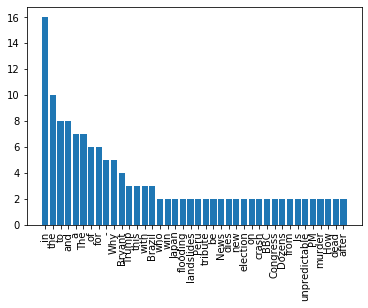

In [152]:
dict_of_headline_words = {}
list_of_headline_words = []
# for item in headline_words:
#     if item in dict_of_headline_words.keys():
#         pass
#     else:
#         dict_of_headline_words[item] = headline_words.count(item)
for item in headline_words:
    list_of_headline_words.extend(item)
df = pd.DataFrame(headline_words)
y = df[0].value_counts()[:40]
x = y.keys()[:40]

plt.bar(x,y,)
plt.xticks(rotation=90)
plt.show()

In [1]:
import requests
import json

In [2]:
import praw 

reddit = praw.Reddit(client_id='nuhI6Ky34sSPdA',
                    client_secret='XXO3JZ1y0MmlaK32vtpbAs65bcs',
                    user_agent='test script')

In [3]:
reddit

In [4]:
top_posts = []
for submission in reddit.subreddit('popular').hot(limit=50):
    top_posts.append(submission.title)

In [5]:
top_posts

["(Serious) Forensic investigators of Reddit: What are some of the most disturbing and horrific cases you've worked on?",
 'President Trump told his national security adviser in August that he wanted to continue freezing $391 million in security assistance to Ukraine until officials there helped with investigations into Democrats including the Bidens, according to unpublished manuscript by former adviser, John R. Bolton.',
 'My kids came in and told me there was water coming from the laundry room. They said it looked like it started at the washer. I rushed in to find this. Buncha comedians in my house...',
 'TIL Ariana Grande tried to get Japanese tattoo that read "Seven Rings" but found out later it read "Small Charcoal Grill" and then attempted to correct it, only for it to still be wrong and then read "Japanese BBQ finger"',
 'Kobe Bryant helicopter crash witness gives an intelligent and detailed account of what he saw',
 'Curiosity after more than 7 years on Mars',
 'Girl Attempts 

In [75]:
words_in_top_10 = []
for item in top_posts:
    words_in_top_10.extend(item.split(' '))

In [88]:
for word in words_in_top_10:
    if word == 'the':
        words_in_top_10.remove(word)
    if word == 'to':
        words_in_top_10.remove(word)
    if word == 'is':
        words_in_top_10.remove(word)
    if word == 'this':
        words_in_top_10.remove(word)   
    if word == 'for':
        words_in_top_10.remove(word)
    if word == 'in':
        words_in_top_10.remove(word)
    if word == 'on':
        words_in_top_10.remove(word)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.DataFrame(words_in_top_10)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

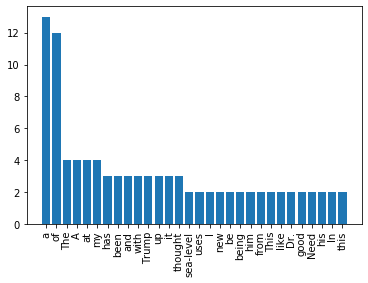

In [90]:
x = df[0].value_counts().keys()[:30]
y = df[0].value_counts()[:30]
plt.bar(x, y, width=.8)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('babe_ruth.db')
cur = conn.cursor()

In [ ]:
cur.execute("""SELECT COUNT(*) FROM babe_ruth_stats""")
df = pd.DataFrame(cur.fetchall())
df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

heroes_df.drop('Unnamed: 0', axis=1, inplace=True)

heroes_df['Publisher'] = heroes_df['Publisher'].map(lambda x: x if (type(x) == int or float) else 
                                    x if x == 'DC Comics' else 
                                    (x if x == 'NBC - Heroes' else 
                                     (x if x == 'ABC Studios'
                                      else x.title())))
# heroes_df[heroes_df['Publisher'] == 'DC Comics']

# x = 'hi'
# type(x) == str

heroes_df['Publisher'].isna()
heroes_df.drop(heroes_df[heroes_df['Publisher'].isna()].index, inplace=True)
heroes_df.isna().any()

In [ ]:
# ^^^3.21pm thursday data cleaning lab project th

In [17]:
def digital_root(n):
    list_of_nums = [int(i) for i in str(n)]
    new_num = sum(list_of_nums)
    if len(str(new_num)) == 1:
        return new_num
    else:
        return digital_root(new_num)

In [18]:
x = [int(i) for i in str(18)]
x

[1, 8]

In [19]:
sum(x)

9

In [22]:
digital_root(493193)

2

In [ ]:
df = pd.read_csv('causes_of_death.tsv', delimiter='\t')
to_drop = df[df['Population'] == 'Not Applicable']
df.drop(to_drop.index, axis=0, inplace=True)
df['Population'] = df['Population'].astype('int64')
grouped = df.groupby(['State', 'Gender'])['Deaths', 
                                          'Population'].agg(['mean',
                                                             'min', 'max', 'std'])

#LATEST 3:53pm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



heroes_df['Publisher'] = heroes_df['Publisher'].map(lambda x: x if (type(x) == int or float) else 
                                    x if x == 'DC Comics' else 
                                    (x if x == 'NBC - Heroes' else 
                                     (x if x == 'ABC Studios'
                                      else x.title())))
# heroes_df[heroes_df['Publisher'] == 'DC Comics']

# x = 'hi'
# type(x) == str

# heroes_df['Publisher'].value_counts(dropna = False)
heroes_df.drop(heroes_df[heroes_df['Publisher'].isna()].index, inplace=False)
heroes_df[heroes_df['Publisher'].isna()]

FileNotFoundError: [Errno 2] File b'titanic.csv' does not exist: b'titanic.csv'

In [29]:

def compliment(dna):
    dna2= []    
    for i in dna:
        if i == 'a':
            dna2.append('t')
        elif i == 't':
            dna2.append('a')
        elif i == 'c':
            dna2.append('g')
        elif i == 'g':
            dna2.append('c')
        else:
            'input is not A,C,T, or G'
    return ''.join(dna2)
    



In [30]:
compliment('actg')

'tgac'

In [12]:
x = 'actg'

In [14]:
x[2].replace('t', 'c')

'c'

In [15]:
x

'actg'

In [3]:
import pandas as pd

In [17]:
df = pd.DataFrame({'col A': [1, 2, 3], 'col b': [4, 5, 6]})

In [22]:
df.head().set_index(['col A'])

,col b
col A,
1,4
2,5
3,6


In [41]:
def sequenceSum(int1, int2, int3):
    if int1 > int2:
        return 0
    else:
        new_list = range(int1, int2+1, int3)
        return sum(new_list)

In [42]:
sequenceSum(1,5,1)

15